<font color="Orangered">

## Word embedding for the IMDB movie review sentiment prediction

A popular and powerful way to associate a vector with a word is the use of dense "word vectors", also called "word embeddings". While the vectors obtained through one-hot encoding are binary, sparse (mostly made of zeros) and very high-dimensional (same dimensionality as the number of words in the vocabulary), "word embeddings" are low-dimensional floating point vectors (i.e. "dense" vectors, as opposed to sparse
vectors). Unlike word vectors obtained via one-hot encoding, word embeddings are learned from data. It is common to see word embeddings that are 256-dimensional, 512-dimensional, or 1024-dimensional when dealing with very large vocabularies. On the other hand, one-hot encoding words generally leads to vectors that are 20,000-dimensional or higher (capturing a vocabulary of 20,000 token in this case). So, word embeddings pack more information into far fewer dimensions.

There are two ways to obtain word embeddings:
- Learn word embeddings jointly with the main task you care about (e.g. document classification or sentiment prediction). In this setup, you would start with random word vectors, then learn your word vectors in the same way that you learn the weights of a neural network.
- Load into your model word embeddings that were pre-computed using a different machine learning task than the one you are trying to solve. These are called "pre-trained word embeddings"
</font>

In [1]:
from keras.layers import Embedding
# The Embedding layer takes at least two arguments:
# the number of possible tokens, here 1000 (1 + maximum word index),
# and the dimensionality of the embeddings, here 64.
embedding_layer = Embedding(1000, 64)

from keras.datasets import imdb
from keras import preprocessing

# Number of words to consider as features
max_features = 10000
# Cut texts after this number of words 
# (among top max_features most common words)
maxlen = 20

# Load the data as lists of integers.
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# This turns our lists of integers
# into a 2D integer tensor of shape `(samples, maxlen)`
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)


from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential()
# We specify the maximum input length to our Embedding layer
# so we can later flatten the embedded inputs
model.add(Embedding(10000, 8, input_length=maxlen))
# After the Embedding layer, 
# our activations have shape `(samples, maxlen, 8)`.

# We flatten the 3D tensor of embeddings 
# into a 2D tensor of shape `(samples, maxlen * 8)`
model.add(Flatten())

# We add the classifier on top
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

test_loss, test_acc = model.evaluate(x_test, y_test)
print('test_acc:', test_acc)


C:\Users\li\anaconda3\envs\LLM\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):
C:\Users\li\anaconda3\envs\LLM\Lib\site-packages\keras\src\layers\core\embedding.py:100: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.5852 - loss: 0.6820 - val_acc: 0.6698 - val_loss: 0.6537
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.7340 - loss: 0.5799 - val_acc: 0.7224 - val_loss: 0.5489
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.7793 - loss: 0.4813 - val_acc: 0.7408 - val_loss: 0.5089
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.8054 - loss: 0.4319 - val_acc: 0.7508 - val_loss: 0.4970
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.8218 - loss: 0.4001 - val_acc: 0.7552 - val_loss: 0.4964
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.8389 - loss: 0.3747 - val_acc: 0.7532 - val_loss: 0.4987
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.8493 - loss: 0.3526 - val_acc: 0.7546 - val_loss: 0.5011
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.8627 - loss: 0.3317 - val_acc: 0.7544 - val_loss: 0.5089
Epoch 9/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - ac

<font color="Orangered">

## Using pre-trained word embedding --- from raw text to word embeddings

- Task: IMDB movie review sentiment prediction
- Goal: Putting it all together: from raw text to word embeddings
- Get the data: First, head to ai.stanford.edu/~amaas/data/sentiment/ and download the raw IMDB dataset (if the URL isn’t working anymore, just Google "IMDB dataset"). Uncompress it.
- Get the pre-trained model: Head to nlp.stanford.edu/projects/glove/ (where you can learn more about the GloVe algorithm), and download the pre-computed embeddings from 2014 English Wikipedia. It’s a 822MB zip file named , containing 100-dimensional glove.6B.zip embedding vectors for 400,000 words (or non-word tokens). Un-zip it.
    
</font>

Found 17456 unique tokens.
Shape of data tensor: (1000, 100)
Shape of label tensor: (1000,)
Found 400000 word vectors.


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │       1,000,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,000,000 (3.81 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 1,000,000 (3.81 MB)

Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - acc: 0.4800 - loss: 1.4339 - val_acc: 0.5275 - val_loss: 0.6946
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - acc: 0.6950 - loss: 0.6144 - val_acc: 0.4938 - val_loss: 0.8056
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - acc: 0.7300 - loss: 0.5417 - val_acc: 0.5525 - val_loss: 0.7009
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - acc: 0.8900 - loss: 0.3460 - val_acc: 0.5063 - val_loss: 1.2710
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - acc: 0.8950 - loss: 0.2589 - val_acc: 0.5050 - val_loss: 1.4217
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - acc: 0.8700 - loss: 0.3456 - val_acc: 0.5175 - val_loss: 0.8383
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - acc: 0.9850 - loss: 0.0981 - val_acc: 0.5337 - val_loss: 0.9079
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - acc: 1.0000 - loss: 0.0599 - val_acc: 0.5763 - val_loss: 0.7800
Epoch 9/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - acc: 0.9850 - loss: 0.0634 - 

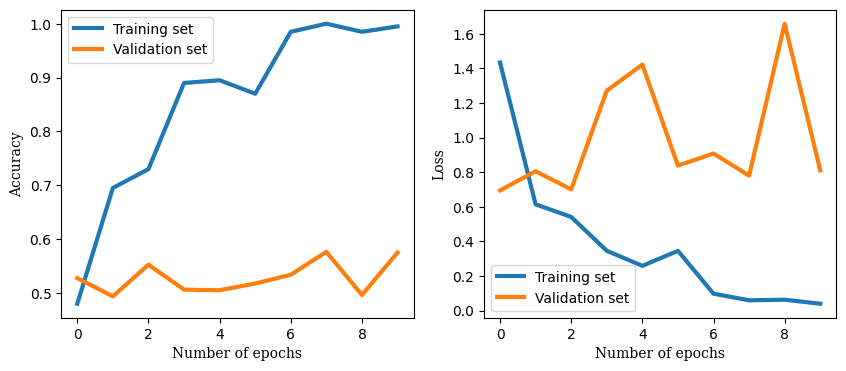

In [7]:
# Import the data
import os
# The path to the directory where the original dataset was uncompressed
original_dataset_dir = r'F:\learning\Deep Learning\ch06\aclImdb_v1.tar\aclImdb_v1\aclImdb\train'
X,y=[],[]
for Pa in ['pos','neg']:
    train_dir = os.path.join(original_dataset_dir, Pa)
    o1=os.listdir(train_dir)
    k=0
    for file in o1:
            if k==500:
                break
            path = os.path.join(train_dir, file)
            with open(path, encoding='utf-8') as f:
              oo1=f.read()
            X.append(oo1)
            if Pa=='pos':
                y.append(1)
            else:
                y.append(0)
            k=k+1
del Pa, o1, k, file, f, oo1
      
# Tokenize the data
#from keras.preprocessing.text import Tokenizer  # This gets error
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 100  # We will cut reviews after 100 words
training_samples = 200  # We will be training on 200 samples
validation_samples = 800  # We will be validating on 800 samples
max_words = 10000  # We will only consider the top 10,000 words in the dataset

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X)
sequences = tokenizer.texts_to_sequences(X) # Each word has been transformed into an integer

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(y)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

# Split the data into a training set and a validation set
# But first, shuffle the data, since we started from data
# where sample are ordered (all negative first, then all positive).
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

# The path to the directory where the pre-trained model is saved
glove_dir = r'F:\learning\Deep Learning\ch06\glove.6B'
embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'), encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Found %s word vectors.' % len(embeddings_index))


embedding_dim = 100
embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector
            
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
model = Sequential()
model.add(Embedding(max_words, embedding_dim, weights=[embedding_matrix],trainable=False))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()   
       
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))
model.save_weights(r'F:\learning\Deep Learning\ch06\pre_trained_glove_model.weights.h5')

def plot_fig(history):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.plot(range(len(history.history['acc'])),history.history['acc'],linewidth=3, label='Training set')
    plt.plot(range(len(history.history['acc'])),history.history['val_acc'],linewidth=3, label='Validation set')
    plt.xlabel("Number of epochs",fontdict= {'family':'serif','size':10})
    plt.ylabel("Accuracy",fontdict= {'family':'serif','size':10})
    plt.legend()
    plt.subplot(1,2,2)
    plt.plot(range(len(history.history['acc'])),history.history['loss'],linewidth=3, label='Training set')
    plt.plot(range(len(history.history['acc'])),history.history['val_loss'],linewidth=3, label='Validation set')
    plt.xlabel("Number of epochs",fontdict= {'family':'serif','size':10})
    plt.ylabel("Loss",fontdict= {'family':'serif','size':10})
    plt.legend()
    plt.show()
plot_fig(history)

<font color="Orangered">

- The model quickly starts overfitting, unsurprisingly given the small number of training samples.
    
</font>

<font color="Orangered">

We can also try to train the same model without loading the pre-trained word embeddings and without freezing the embedding layer. In that case, we would be learning a task-specific embedding of our input tokens, which is generally more powerful than pre-trained word embeddings when lots of data is available. However, in our case, we have only 200 training samples. Let’s try it:
    
</font>

Found 17456 unique tokens.


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - acc: 0.5050 - loss: 0.6927 - val_acc: 0.5175 - val_loss: 0.6920
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - acc: 0.9850 - loss: 0.5420 - val_acc: 0.5125 - val_loss: 0.6967
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - acc: 0.9950 - loss: 0.3766 - val_acc: 0.5288 - val_loss: 0.6996
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - acc: 0.9950 - loss: 0.2055 - val_acc: 0.5325 - val_loss: 0.7100
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - acc: 1.0000 - loss: 0.1073 - val_acc: 0.5263 - val_loss: 0.7010
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - acc: 1.0000 - loss: 0.0589 - val_acc: 0.5275 - val_loss: 0.7131
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - acc: 1.0000 - loss: 0.0348 - val_acc: 0.5325 - val_loss: 0.7205
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - acc: 1.0000 - loss: 0.0225 - val_acc: 0.5362 - val_loss: 0.7391
Epoch 9/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - acc: 1.0000 - loss: 0.0156 - 

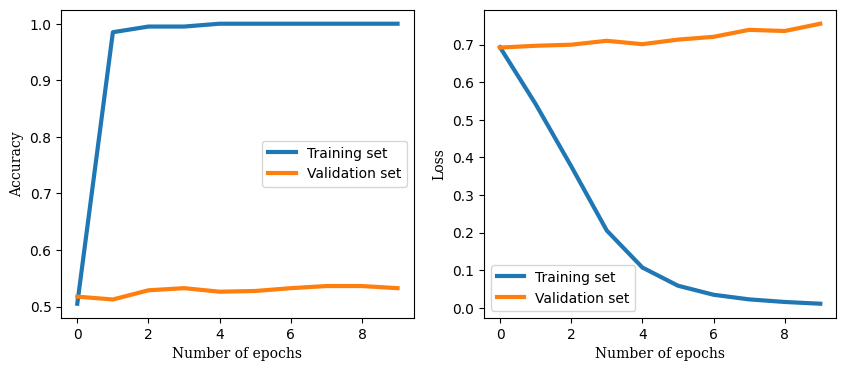

In [8]:
# Import the data
import os
# The path to the directory where the original dataset was uncompressed
original_dataset_dir = r'F:\learning\Deep Learning\ch06\aclImdb_v1.tar\aclImdb_v1\aclImdb\train'
X,y=[],[]
for Pa in ['pos','neg']:
    train_dir = os.path.join(original_dataset_dir, Pa)
    o1=os.listdir(train_dir)
    k=0
    for file in o1:
            if k==500:
                break
            path = os.path.join(train_dir, file)
            with open(path, encoding='utf-8') as f:
              oo1=f.read()
            X.append(oo1)
            if Pa=='pos':
                y.append(1)
            else:
                y.append(0)
            k=k+1
del Pa, o1, k, file, f, oo1
      
# Tokenize the data
#from keras.preprocessing.text import Tokenizer  # This gets error
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 100  # We will cut reviews after 100 words
training_samples = 200  # We will be training on 200 samples
validation_samples = 800  # We will be validating on 800 samples
max_words = 10000  # We will only consider the top 10,000 words in the dataset

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X)
sequences = tokenizer.texts_to_sequences(X) # Each word has been transformed into an integer

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)
labels = np.asarray(y)

# Split the data into a training set and a validation set
# But first, shuffle the data, since we started from data
# where sample are ordered (all negative first, then all positive).
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]
       
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
model = Sequential()
model.add(Embedding(max_words, embedding_dim))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()   
       
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))
model.save_weights(r'F:\learning\Deep Learning\ch06\pre_trained_glove_model.weights.h5')

def plot_fig(history):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.plot(range(len(history.history['acc'])),history.history['acc'],linewidth=3, label='Training set')
    plt.plot(range(len(history.history['acc'])),history.history['val_acc'],linewidth=3, label='Validation set')
    plt.xlabel("Number of epochs",fontdict= {'family':'serif','size':10})
    plt.ylabel("Accuracy",fontdict= {'family':'serif','size':10})
    plt.legend()
    plt.subplot(1,2,2)
    plt.plot(range(len(history.history['acc'])),history.history['loss'],linewidth=3, label='Training set')
    plt.plot(range(len(history.history['acc'])),history.history['val_loss'],linewidth=3, label='Validation set')
    plt.xlabel("Number of epochs",fontdict= {'family':'serif','size':10})
    plt.ylabel("Loss",fontdict= {'family':'serif','size':10})
    plt.legend()
    plt.show()
plot_fig(history)

<font color="Orangered">

- Validation accuracy stalls in the low 50s. So in our case, pre-trained word embeddings does outperform jointly learned embeddings. If you increase the number of training samples, this will quickly stop being the case.
    
</font>

<font color="Orangered">

Finally, let’s evaluate the model on the test data. First, we will need to tokenize the test data:
    
</font>

In [9]:
 # Import the test data
# The path to the directory where the original dataset was uncompressed
original_dataset_dir = r'F:\learning\Deep Learning\ch06\aclImdb_v1.tar\aclImdb_v1\aclImdb\test'
X_test,y_test=[],[]
for Pa in ['pos','neg']:
    train_dir = os.path.join(original_dataset_dir, Pa)
    o1=os.listdir(train_dir)
    k=0
    for file in o1:
            if k==500:
                break
            path = os.path.join(train_dir, file)
            with open(path, encoding='utf-8') as f:
              oo1=f.read()
            X_test.append(oo1)
            if Pa=='pos':
                y_test.append(1)
            else:
                y_test.append(0)
            k=k+1
del Pa, o1, k, file, f, oo1
#tokenizer = Tokenizer(num_words=max_words)
#tokenizer.fit_on_texts(X)
sequences_test = tokenizer.texts_to_sequences(X_test) # Each word has been transformed into an integer
data_test = pad_sequences(sequences_test, maxlen=maxlen)
labels_test = np.asarray(y)
test_loss, test_acc = model.evaluate(data_test, labels_test)
print('test_acc:', test_acc)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.5280 - loss: 0.7753
test_acc: 0.527999997138977


<font color="Orangered">

- We get an appalling test accuracy of 53%. Working with just a handful of training samples is hard!
</font>